<a href="https://colab.research.google.com/github/vidyasagarverma/Image-Classification/blob/vidyasagarverma-patch-1/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
hello = tf.constant('Hello, TensorFlow!')

In [0]:
hello 

<tf.Tensor 'Const:0' shape=() dtype=string>

In [0]:
import tensorflow.keras as keras

In [0]:

import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

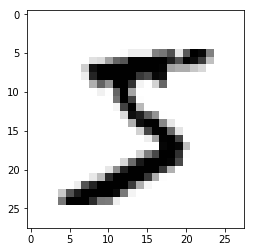

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
print(y_train[0])

5


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

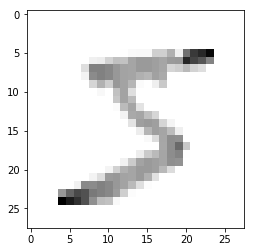

In [0]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


In [0]:
model = tf.keras.models.Sequential()


In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#Now, we're ready for an output layer:

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2650 - acc: 0.9216
Epoch 2/3
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1070 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0720 - acc: 0.9781


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.1088 - acc: 0.9648
0.10884520966336131
0.9648


In [0]:
model.save('epic_num_reader.model')

In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)

In [0]:
print(predictions)


[[1.45937335e-07 1.53904568e-06 8.13617226e-06 ... 9.99853969e-01
  1.37592380e-07 4.43544959e-05]
 [8.06015032e-10 7.13798821e-01 2.85588831e-01 ... 1.96654412e-07
  5.57363137e-07 2.38998890e-11]
 [3.06033741e-07 9.99981284e-01 1.26218640e-06 ... 1.36779920e-06
  5.75923741e-06 4.81239022e-06]
 ...
 [2.04741935e-09 1.49072030e-05 1.87732937e-07 ... 2.42008409e-05
  1.29613145e-05 7.57813759e-05]
 [4.73891504e-07 2.60090110e-06 1.05156870e-08 ... 8.19891795e-07
  5.72530917e-06 3.09052588e-08]
 [5.27409263e-08 9.97344429e-08 4.64774352e-08 ... 8.33216274e-10
  1.42817069e-09 1.86005673e-11]]
